In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

## 4. Evaluation Metrics for Classification

In the previous session we trained a model for predicting churn. How do we know if it's good?

*4.1 Evaluation metrics: session overview*

* Dataset: [https://www.kaggle.com/blastchar/telco-customer-churn](https://www.kaggle.com/blastchar/telco-customer-churn)
* [https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv)

*Metric* - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [4]:
#!wget $data

In [5]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [6]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [7]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [8]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [9]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

## 4.2 Accuracy and dummy model

* Evaluate the model on different thresholds
* Check the accuracy of dummy baselines

In [10]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f  %.3f' % (t, score))
    scores.append(score)

0.00  0.274
0.05  0.513
0.10  0.608
0.15  0.661
0.20  0.703
0.25  0.734
0.30  0.758
0.35  0.765
0.40  0.782
0.45  0.791
0.50  0.803
0.55  0.801
0.60  0.796
0.65  0.789
0.70  0.766
0.75  0.742
0.80  0.729
0.85  0.726
0.90  0.726
0.95  0.726
1.00  0.726


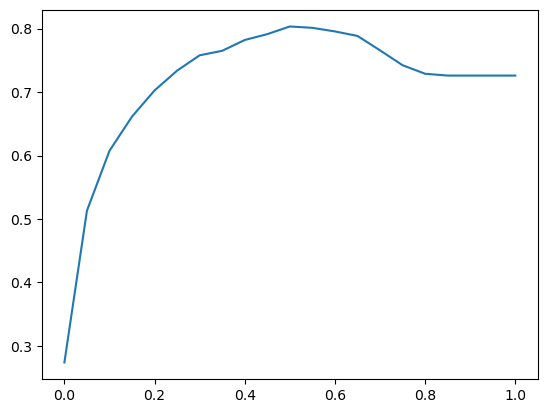

In [11]:
plt.plot(thresholds, scores)

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred >= 0.5)

0.8034066713981547

In [13]:
scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f  %.3f' % (t, score))
    scores.append(score)

0.00  0.274
0.05  0.513
0.10  0.608
0.15  0.661
0.20  0.703
0.25  0.734
0.30  0.758
0.35  0.765
0.40  0.782
0.45  0.791
0.50  0.803
0.55  0.801
0.60  0.796
0.65  0.789
0.70  0.766
0.75  0.742
0.80  0.729
0.85  0.726
0.90  0.726
0.95  0.726
1.00  0.726


In [14]:
from collections import Counter

In [15]:
Counter(y_pred >= 1)

Counter({np.False_: 1409})

In [16]:
Counter(y_val)

Counter({np.int64(0): 1023, np.int64(1): 386})

In [17]:
y_val.mean() # churning customers

np.float64(0.2739531582682754)

In [18]:
1 - y_val.mean() # non churning

np.float64(0.7260468417317246)

## 4.3 Confusion table

* Different types of errors and correct decisions
* Arranging them in a table

In [19]:
actual_possitive = (y_val == 1)
actual_negative = (y_val == 0)
actual_possitive, actual_negative

(array([False, False, False, ..., False,  True,  True], shape=(1409,)),
 array([ True,  True,  True, ...,  True, False, False], shape=(1409,)))

In [20]:
t = 0.5

predict_possitve = (y_pred >= t)
predict_negative = (y_pred < t)
predict_possitve, predict_negative

(array([False, False, False, ..., False,  True,  True], shape=(1409,)),
 array([ True,  True,  True, ...,  True, False, False], shape=(1409,)))

In [21]:
tp = (predict_possitve & actual_possitive).sum()
tn = (predict_negative & actual_negative).sum()
tp, tn

(np.int64(212), np.int64(920))

In [22]:
fp = (predict_possitve & actual_negative).sum()
fn = (predict_negative & actual_possitive).sum()
fp, fn

(np.int64(103), np.int64(174))

In [23]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[920, 103],
       [174, 212]])

In [24]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

## 4.4 Precision and Recall

In [25]:
(tp + tn) / (tp + tn + fp + fn)

np.float64(0.8034066713981547)

In [26]:
p = tp / (tp + fp)  # precision
p

np.float64(0.6730158730158731)

In [27]:
r = tp / (tp + fn)
r

np.float64(0.5492227979274611)

## 4.5 ROC Curves

### TPR and FRP

In [28]:
tpr = tp / (fn + tp)
tpr

np.float64(0.5492227979274611)

In [29]:
fpr = fp / (fp + tn)
fpr

np.float64(0.10068426197458455)

In [30]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [31]:
scores

[(np.float64(0.0), np.int64(386), np.int64(1023), np.int64(0), np.int64(0)),
 (np.float64(0.01), np.int64(385), np.int64(894), np.int64(1), np.int64(129)),
 (np.float64(0.02), np.int64(383), np.int64(804), np.int64(3), np.int64(219)),
 (np.float64(0.03), np.int64(382), np.int64(749), np.int64(4), np.int64(274)),
 (np.float64(0.04), np.int64(382), np.int64(709), np.int64(4), np.int64(314)),
 (np.float64(0.05), np.int64(378), np.int64(678), np.int64(8), np.int64(345)),
 (np.float64(0.06), np.int64(377), np.int64(653), np.int64(9), np.int64(370)),
 (np.float64(0.07), np.int64(374), np.int64(623), np.int64(12), np.int64(400)),
 (np.float64(0.08), np.int64(371), np.int64(588), np.int64(15), np.int64(435)),
 (np.float64(0.09), np.int64(370), np.int64(557), np.int64(16), np.int64(466)),
 (np.float64(0.1), np.int64(366), np.int64(533), np.int64(20), np.int64(490)),
 (np.float64(0.11), np.int64(365), np.int64(512), np.int64(21), np.int64(511)),
 (np.float64(0.12), np.int64(361), np.int64(497), 

In [32]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,894,1,129
2,0.02,383,804,3,219
3,0.03,382,749,4,274
4,0.04,382,709,4,314
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [33]:
df_scores['tpr'] = df_scores.tp / (df_scores.fn + df_scores.tp)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [34]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,533,20,490,0.948187,0.521017
20,0.2,339,372,47,651,0.878238,0.363636
30,0.3,292,247,94,776,0.756477,0.241447
40,0.4,254,175,132,848,0.658031,0.171065
50,0.5,212,103,174,920,0.549223,0.100684
60,0.6,151,53,235,970,0.391192,0.051808
70,0.7,69,13,317,1010,0.178756,0.012708
80,0.8,4,0,382,1023,0.010363,0.000000
90,0.9,0,0,386,1023,0.000000,0.000000


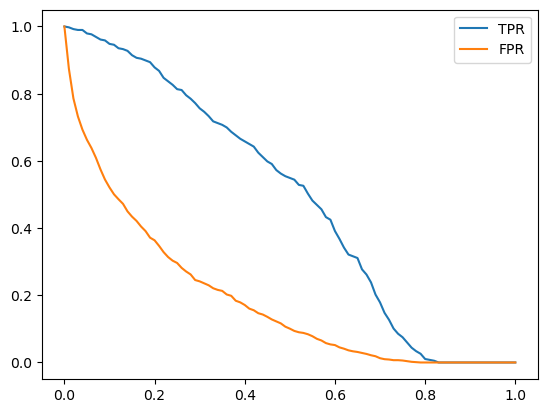

In [35]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

### Random model

In [36]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

y_rand

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, ...,
       7.73916250e-01, 3.34276405e-01, 8.89982208e-02], shape=(1409,))

Check accuracy for random model

In [37]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [38]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        
        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.fn + df_scores.tp)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [39]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


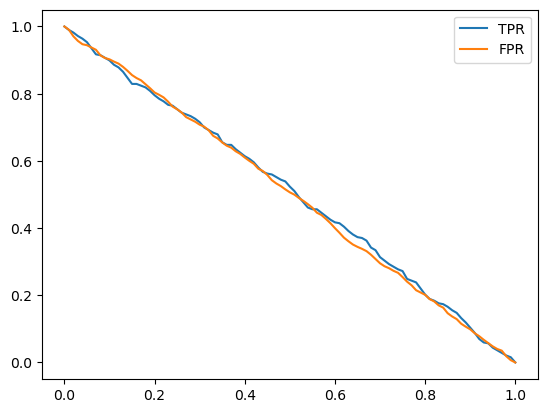

In [40]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

### Ideal model

In [41]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(1023), np.int64(386))

In [42]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos]) # repeats 0 for num_neg elements and 1 for num_pos elements
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [43]:
y_ideal_predictions = np.linspace(0, 1, len(y_val))
y_ideal_predictions

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00], shape=(1409,))

In [44]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [45]:
((y_ideal_predictions >= 0.726) == y_ideal).mean()

np.float64(1.0)

In [46]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_predictions)

In [47]:
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


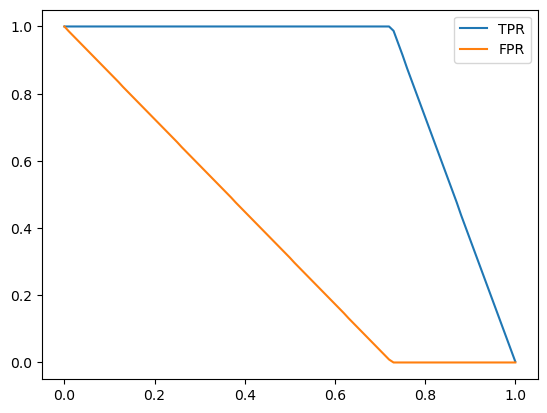

In [48]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

### Putting everything together

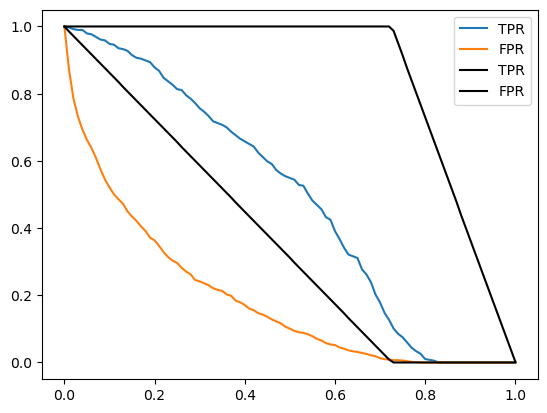

In [49]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR', color='black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR', color='black')

plt.legend()

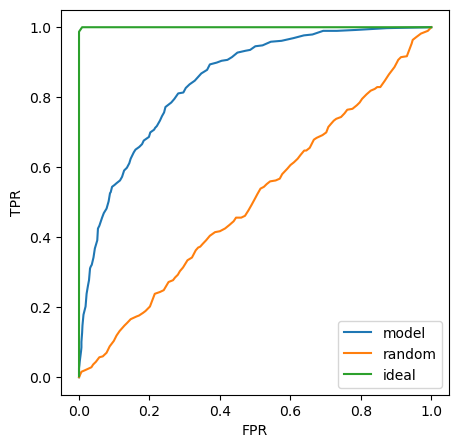

In [50]:
plt.figure(figsize=(5, 5)) #ROC graphs are square
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_rand.fpr, df_rand.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [51]:
# can use scikit learn to draw the ROC graph
from sklearn.metrics import roc_curve

In [52]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

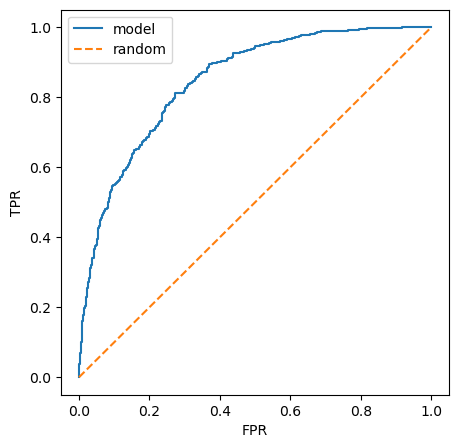

In [53]:
plt.figure(figsize=(5, 5)) #ROC graphs are square
plt.plot(fpr, tpr, label='model')
plt.plot([0, 1], [0, 1], label='random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

## 4.6 ROC AUC (Area Under Curve)

* Area under the ROC curve - useful metric
* Interpretation of AUC

In [54]:
from sklearn.metrics import auc

In [55]:
auc(fpr, tpr)

0.8463120254863528

In [56]:
auc(df_scores.fpr, df_scores.tpr)

0.8459194991870908

Area Under Curv (AOC) is the probability that a randomly selected positive example has a higher score than a randomly selected negative value.

In [57]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]
neg, pos

(array([0.0066238 , 0.20482253, 0.21781799, ..., 0.08290035, 0.29130676,
        0.15149644], shape=(1023,)),
 array([0.56375043, 0.59380571, 0.46602188, 0.73671762, 0.08257308,
        0.6949975 , 0.24905304, 0.68711688, 0.2184182 , 0.66247714,
        0.43815467, 0.35229513, 0.17171282, 0.59007584, 0.75027234,
        0.16044584, 0.4349552 , 0.28584394, 0.07537472, 0.22437698,
        0.65492017, 0.41971678, 0.66868184, 0.56910943, 0.53977218,
        0.44106616, 0.48371254, 0.33340156, 0.58462877, 0.34732773,
        0.61000641, 0.72954351, 0.72909964, 0.58951215, 0.68077991,
        0.76279634, 0.11035196, 0.20110648, 0.51463039, 0.56562619,
        0.46768427, 0.47944619, 0.7486788 , 0.38877417, 0.6875747 ,
        0.42481985, 0.74518847, 0.31571771, 0.53581632, 0.56932934,
        0.11258687, 0.5419867 , 0.78036282, 0.45200331, 0.68757235,
        0.7597699 , 0.01459588, 0.36880466, 0.77677413, 0.57482946,
        0.67942713, 0.26407816, 0.36712366, 0.70054474, 0.21849742,
      

In [58]:
import random

In [60]:
pos_idx = random.randint(0, len(pos) - 1)
neg_idx = random.randint(0, len(neg) - 1)
pos_idx, neg_idx

(36, 674)

In [62]:
pos[pos_idx] > neg[neg_idx]

np.False_

In [64]:
n = 100000
success = 0

for i in range(n):
    pos_idx = random.randint(0, len(pos) - 1)
    neg_idx = random.randint(0, len(neg) - 1)

    if pos[pos_idx] > neg[neg_idx]:
        success = success + 1

success / n

0.84606

In [69]:
n = 50000
np.random.seed(1)

pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

In [67]:
pos[pos_ind] > neg[neg_idx]

array([ True,  True,  True, ...,  True,  True,  True], shape=(10000,))

In [70]:
(pos[pos_ind] > neg[neg_idx]).mean()

np.float64(0.95956)

## 4.7 Cross-Validation

* Evaluating the same model on different subsets of data
* Getting the average prediction and the spread within predictions

## 4.8 Summary

* Metric - a single number that describes the performance of a model
* Accuracy - fraction of correct answers; sometimes misleading
* Precision and recall are less misleading when we have class inbalance
* ROC Curve - a way to evaluate the performance at all thresholds; okay to use with imbalance
* K-Fold CV - more reliable estimate for performance (mean + std)

## 4.9 Explore more

* Check the precision and recall of the dummy classifier that always predict "FALSE"
* ```F1 score = 2 * P * R / (P + R)```
* Evaluate precision and recall at different thresholds, plot P vs R - this way you'll get the precision/recall curve (similar to ROC curve)
* Area under the PR curve is also a useful metric

Other projects:

Calculate the metrics for datasets from the previous week